In [1]:
from dqn_agent import DQN
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
names=[]


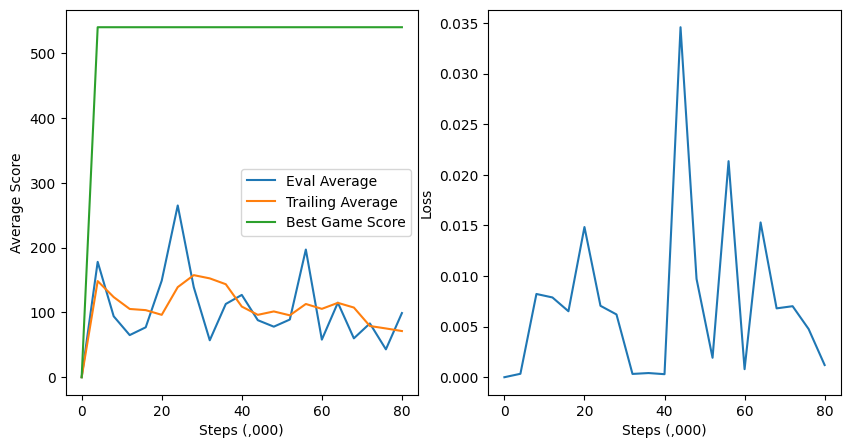

steps=80000, episodes=458
Best Score: 540.0
Trailing Avg (last 20): 71.25
Time elapsed: 0:02:02


steps:100%|████████████████████████████|80,000/80,000[t:02:02/00:00], eps=458, ev_avg=43.0, tr_avg=75.2, rate=669.5 st/s

['logs/sp_inv_synch_test/rainbow_synchronous_3']


In [2]:
p = dict(
    name=               'rainbow_synchronous',
    note=               ''' with 8 vectorized environments. ''',
    env_name =          'SpaceInvaders', # defaults to NoFrameskip-v4 version
    log_dir=            'sp_inv_synch_test',
    overwrite_previous= False,
    asynchronous=       False,
    doubleQ=            True,
    dueling=            False,
    noisy_linear=       False,
    categorical_DQN=    False,
    prioritized_replay= False,
    n_step_learning=    False,
    screen_size=        84,
    random_starts=      4000,
    memory_size=        1_000_000,
    eval_interval=      4000,
    max_steps=          80000, #2_000_000,#10_000_000, 
    record_interval=    80000, 
    n_games_per_eval=   5,
    n_envs=             8,
    pbar_update_interval= 800,
    seed=               42
    )
dqn = DQN(p)

dqn.train()
names.append(dqn.filepaths.sub_dir)
print(names)


In [ ]:
# stop here
# 
assert False

In [ ]:
p.update(
    name=               'rainbow_copy',
    #asynchronous=       False,
    )
dqn = DQN(p)
dqn.train()
names.append(dqn.filepaths.sub_dir)
print(names)

In [ ]:
# plot all the results in the log folder
from plot_multiple_results import plot_multiple_results
col = 'trailing_avg'
assert col in ['best_score','eval_avg','trailing_avg','loss']

from plot_multiple_results import plot_multiple_results

plot_multiple_results(os.path.join('logs',p['log_dir']), names, 'trailing_avg')
